<a href="https://colab.research.google.com/github/Gabrielaqf16/alurastore/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



En este primer análisis, se debe de calcular el ingreso total de cada tienda. Se suman los valores de la columna Precio de cada conjunto de datos de la tienda (4 en total) para estimar los ingresos. De estos se muestran en gráficos.

In [ ]:
#Se importa tablas (Dataframes) a través de pandas.
import pandas as pd
#Estas líneas contienen enlaces a archivos CVS en línea.
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"
#Cada uno es un DataFrame de pandas, una tabla por tienda, en total 4.
tienda = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

#Se usa una lista, para procesarlo como un bucle. Luego, se calcula los ingresos
tiendas_data = [tienda, tienda2, tienda3, tienda4]
ingresos = []
nombres_tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
#usar bucle for, se usa zip para recorrido simultáneo
for nombre, df in zip(nombres_tiendas, tiendas_data):
#Dataframe suma todos los valores de la columna precio de cada tienda.
    ingreso_total = df["Precio"].sum()
#Ingreso_total, es el resultado de sumar todos los valores
    ingresos.append(ingreso_total)
#Muestra el resultado con formato en comas y decimales(.2f)
    print(f'El ingreso total de {nombre} es: {ingreso_total:,.2f}')


El ingreso total de Tienda 1 es: 1,150,880,400.00
El ingreso total de Tienda 2 es: 1,116,343,500.00
El ingreso total de Tienda 3 es: 1,098,019,600.00
El ingreso total de Tienda 4 es: 1,038,375,700.00


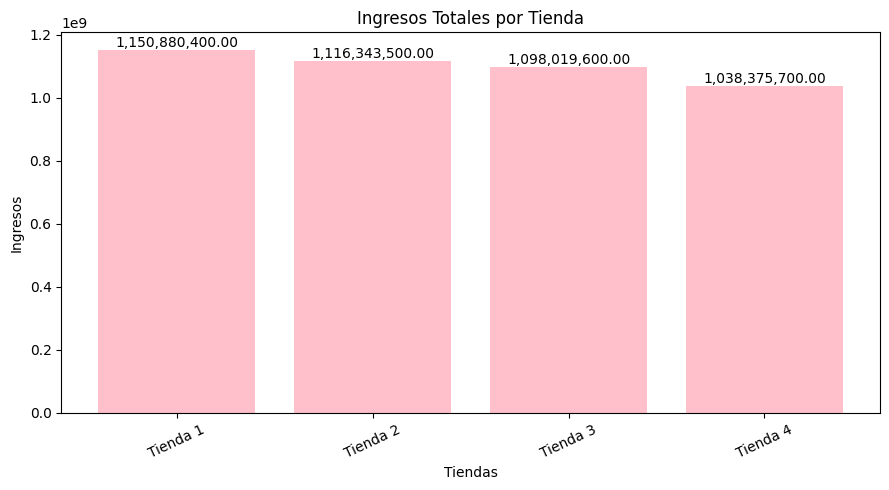

In [ ]:
import matplotlib.pyplot as plt
#Tamaño
plt.figure(figsize=(9, 5))
#eje x = nombres de tienda, eje y = ingresos y color de las barras
plt.bar(nombres_tiendas, ingresos, color='pink')
#título del gráfico
plt.title('Ingresos Totales por Tienda')
#nombre de eje x
plt.xlabel('Tiendas')
#nombre de eje y
plt.ylabel('Ingresos')
#Las palabras del eje x salen inclinadas
plt.xticks(rotation=25)
#Para ajustar para que no se acorten los texto del gráfico
plt.tight_layout()

# Añade etiquetas numéricas a las barras, enumerate(ingresos) recorre la lista ingresos
for i, valor in enumerate(ingresos):
  #El valor está justo por encima de la barra, contenido del texto {valor:,.2f}
    plt.text(i, valor, f'{valor:,.2f}', ha='center', va='bottom')

plt.show()

# 2. Ventas por categoría

En este segundo análisis se debe de calcular la cantidad de productos vendidos por categoría en cada tienda. La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo (es decir el número de productos por categoría), mostrando las categorías más populares de cada tienda.

In [ ]:
#Se importa tablas (Dataframes) a través de pandas.
import pandas as pd
#Estas líneas contienen enlaces a archivos CVS en línea.
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"
#Cada uno es un DataFrame de pandas, una tabla por tienda, en total 4.
tienda = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# Agrupación por categoría - Conteo en lugar de suma, cuenta cuantas veces aparece el producto con value_counts()
ventas_tienda = tienda["Categoría del Producto"].value_counts()
ventas_tienda2 = tienda2["Categoría del Producto"].value_counts()
ventas_tienda3 = tienda3["Categoría del Producto"].value_counts()
ventas_tienda4 = tienda4["Categoría del Producto"].value_counts()

# Imprimir resultados
print("Productos vendidos por categoría - Tienda 1:")
print(ventas_tienda)
print("\nProductos vendidos por categoría - Tienda 2:")
print(ventas_tienda2)
print("\nProductos vendidos por categoría - Tienda 3:")
print(ventas_tienda3)
print("\nProductos vendidos por categoría - Tienda 4:")
print(ventas_tienda4)

Productos vendidos por categoría - Tienda 1:
Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: count, dtype: int64

Productos vendidos por categoría - Tienda 2:
Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: count, dtype: int64

Productos vendidos por categoría - Tienda 3:
Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Instrumentos musicales     177
Artículos para el hogar    17

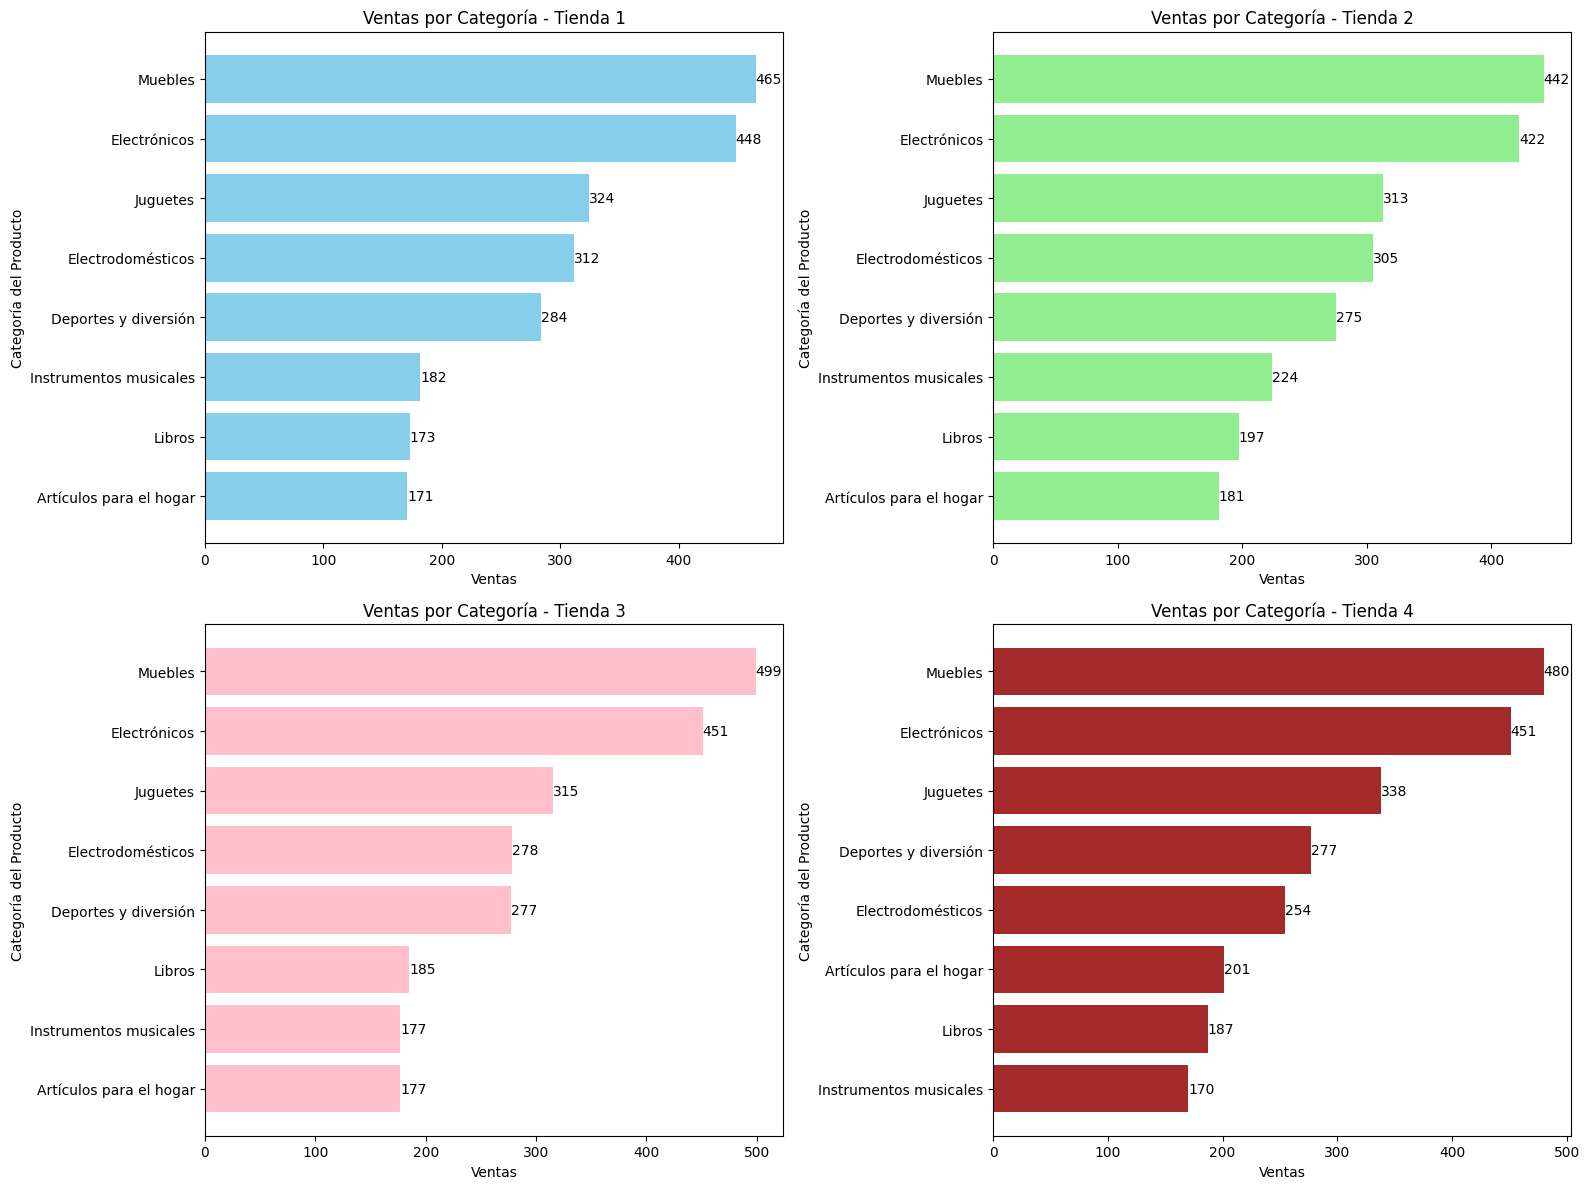

In [ ]:
import matplotlib.pyplot as plt

# Lista de DataFrames de ventas por categoría para cada tienda
ventas_por_tienda = [ventas_tienda, ventas_tienda2, ventas_tienda3, ventas_tienda4]
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'] #Lista con los nombres que se usarán en los gráficos para cada tienda
colores = ['skyblue', 'lightgreen', 'pink', 'brown'] #Lista de colores que se usaran cada tienda

# Tamaño general de la figura (ancho, alto)
plt.figure(figsize=(16, 12))

# Generar un gráfico por tienda, se recorre ventas de las tiendas vinculados al nombre correspondiente de la tienda.
for i, (ventas, nombre) in enumerate(zip(ventas_por_tienda, nombres_tiendas), start=1):
    # Distribuir en 2 filas, 2 columnas el gráfico, el indice i indica la posición (1 a 4)
    plt.subplot(2, 2, i)
    #dibujamos el gráfico con categoría de productos (muebles, electrónicos, etc.) (eje y), ventas (eje x), i inicia en 1, por tanto, i-1= posición 0.
    plt.barh(ventas.index, ventas.values, color=colores[i - 1])
    plt.title(f'Ventas por Categoría - {nombre}') #título de cada gráfico
    plt.xlabel('Ventas')
    plt.ylabel('Categoría del Producto')
    plt.gca().invert_yaxis()  # Para que la categoría más vendida quede arriba, invierte.
    # Agregar valores al final de las barras, enumerate, nos da j índice de posición y el número de venta.
    for j, valor in enumerate(ventas.values):
        plt.text(valor, j, f'{valor:,.0f}', va='center') #muestra el número de productos
#Para que el gráfico se ajuste
plt.tight_layout()
plt.show() #muestra gráfico


# 3. Calificación promedio de la tienda


El tercer análisis debes calcular las calificaciones promedio de los clientes para cada tienda. El objetivo es conocer la satisfacción del cliente con los productos vendidos.

In [ ]:
import pandas as pd

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

#Crear listas de tiendas
tiendas = [tienda, tienda2, tienda3, tienda4]
# Lista vacía para almacenar el promedio de calificaciones
calificaciones = []
#recorrer cada Dataframe (t), recorre la lista
for i, t in enumerate(tiendas, start=1):
  #Dar el promedio de calificaicón
    calificacion_media = t["Calificación"].mean()
    #Guarda este promedio en la lista de calificaciones
    calificaciones.append(calificacion_media)
    print(f"La calificación media de la tienda {i} es: {calificacion_media:.2f}")


La calificación media de la tienda 1 es: 3.98
La calificación media de la tienda 2 es: 4.04
La calificación media de la tienda 3 es: 4.05
La calificación media de la tienda 4 es: 4.00


# 4. Productos más y menos vendidos

El cuarto análisis se debe de identificar qué productos fueron los más vendidos y los menos vendidos en cada tienda. Visualiza los resultados para que quede claro qué productos destacaron en ventas en cada tienda.

In [ ]:
import pandas as pd

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

#Lista con los DataFrames
tiendas = [tienda1, tienda2, tienda3, tienda4]
#Lista con los nombres de las tiendas
nombres = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
#Lista vacía para los resultados
productos_destacados = []
#zip recorrer cada DF y nombre
for tienda_df, nombre in zip(tiendas, nombres):
    ventas = tienda_df['Producto'].value_counts() #Contar los productos que aparecen
    mas_vendido = ventas.idxmax()
    menos_vendido = ventas.idxmin()

    productos_destacados.append({
        'Tienda': nombre,
        'Producto más Vendido': mas_vendido,
        'Cantidad más Vendida': ventas.max(),
        'Producto menos Vendido': menos_vendido,
        'Cantidad menos Vendida': ventas.min()
    })

df_productos_destacados = pd.DataFrame(productos_destacados)

print("Productos más y menos vendidos por tienda:\n")
print(df_productos_destacados)

Productos más y menos vendidos por tienda:

     Tienda       Producto más Vendido  Cantidad más Vendida  \
0  Tienda 1                 Microondas                    60   
1  Tienda 2  Iniciando en programación                    65   
2  Tienda 3              Kit de bancas                    57   
3  Tienda 4                   Cama box                    62   

      Producto menos Vendido  Cantidad menos Vendida  
0  Auriculares con micrófono                      33  
1              Juego de mesa                      32  
2    Bloques de construcción                      35  
3         Guitarra eléctrica                      33  


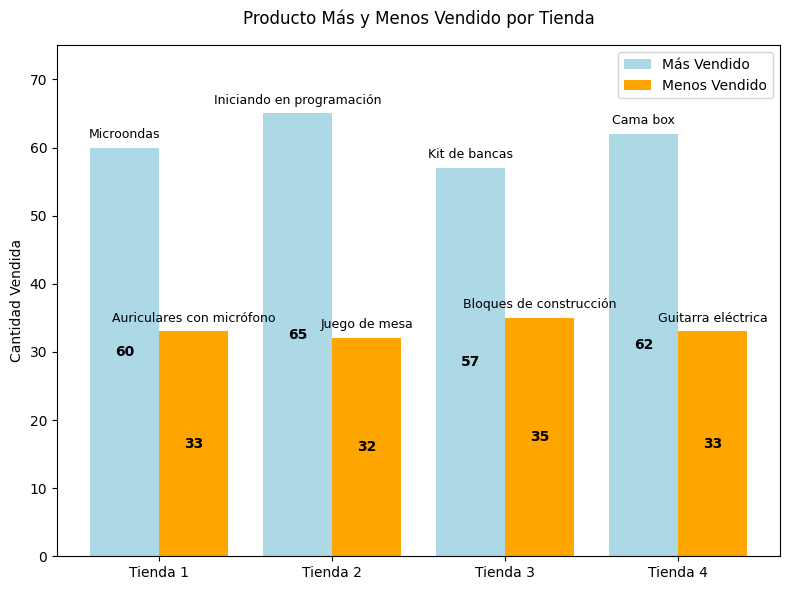

In [ ]:
import matplotlib.pyplot as plt
#podemos trabajar con numpy para trabajar números
import numpy as np

# df_productos_destacados = pd.DataFrame(...)

# Obtener datos desde el DataFrame
tiendas = df_productos_destacados['Tienda']
cantidades_mas = df_productos_destacados['Cantidad más Vendida']
cantidades_menos = df_productos_destacados['Cantidad menos Vendida']
productos_mas = df_productos_destacados['Producto más Vendido']
productos_menos = df_productos_destacados['Producto menos Vendido']

x = np.arange(len(tiendas))
width = 0.4

# Crear gráfico
plt.figure(figsize=(8, 6))
barras_mas = plt.bar(x - width/2, cantidades_mas, width, label='Más Vendido', color='lightblue')
barras_menos = plt.bar(x + width/2, cantidades_menos, width, label='Menos Vendido', color='orange')

plt.title('Producto Más y Menos Vendido por Tienda', fontsize=12, pad=15)
plt.ylabel('Cantidad Vendida')
plt.xticks(x, tiendas)
plt.legend(loc='upper right')

# Agregar etiquetas
for i in range(len(tiendas)):
  #Incluir número dentro de barra, transformar a string
    plt.text(x[i] - width/2, cantidades_mas.iloc[i] / 2, str(cantidades_mas.iloc[i]),
             ha='center', va='center', color='black', fontsize=10, fontweight='bold')
    plt.text(x[i] + width/2, cantidades_menos.iloc[i] / 2, str(cantidades_menos.iloc[i]),
             ha='center', va='center', color='black', fontsize=10, fontweight='bold')
#incluir los nombres de los productos encima de las barras
    plt.text(x[i] - width/2, cantidades_mas.iloc[i] + 1, productos_mas.iloc[i],
             ha='center', va='bottom', fontsize=9)
    plt.text(x[i] + width/2, cantidades_menos.iloc[i] + 1, productos_menos.iloc[i],
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
#ajustar gráfico, calcula cantidad más vendida, menos vendida con un margen de 10 para arriba
plt.ylim(0, max(cantidades_mas.max(), cantidades_menos.max()) + 10)
plt.show()

# 5. Envío promedio por tienda

El último análisis, se debe de calcular el costo de envío promedio para cada tienda. El objetivo es comprender cuánto se gasta, en promedio, en el envío de cada tienda.

In [ ]:
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

#Lista de DataFrames
tiendas = [tienda, tienda2, tienda3, tienda4]
# Lista para almacenar las calificaciones medias
costos = []

#recorre tiendas, empezando desde 1
for i, t in enumerate(tiendas, start=1):
  #calcula el promedio de la columna costo envío
    costos_media = t["Costo de envío"].mean()
    costos.append(costos_media)  # Guarda cada calificación en lista costos
    print(f"El costo de envío promedio de la tienda {i} es: {costos_media:,.2f}") #imprimir resultados


El costo de envío promedio de la tienda 1 es: 26,018.61
El costo de envío promedio de la tienda 2 es: 25,216.24
El costo de envío promedio de la tienda 3 es: 24,805.68
El costo de envío promedio de la tienda 4 es: 23,459.46


**ANÁLISIS**

Objetivo: Determinar cuál de las cuatro tiendas presenta el menor rendimiento en términos de ingresos, ventas por categoría, calificación de clientes y costos operativos, para considerar una posible decisión de venta.

Resultados:

- Menores ingresos totales : Tienda 4
- Menores venta en productos con más costo (Electrodomésticos e Instrumentos musicales) : Tienda 4 *Aunque tenga buenas ventas en otros productos pero son de menor costo y esto repercute en las ganancias.
- Promedio bajo en calificación: Tienda 1 y tienda 4
- Costos de envío: aunque el costo de envío es más bajo en la tienda 4, no lo compensa.

Conclusiones:

- Tras evaluar los datos de los resultados, la Tienda 4:

- Genera el menor ingreso total.

- Tiene una calificación promedio baja.

- Presenta ventas más débiles en categorías clave como Electrodomésticos e Instrumentos.

- Aunque tiene bajo costo de envío, esto no mejora significativamente su rentabilidad.

Recomendación:

Considerar la venta de la Tienda 4, ya que actualmente es la que menos lucros genera en comparación con las otras tres, y no muestra ventajas competitivas suficientes para justificar su continuidad operativa.

